## Solução do problema térmico 1-D: Elemento linear

- Método dos Elementos finitas - Elemento linear

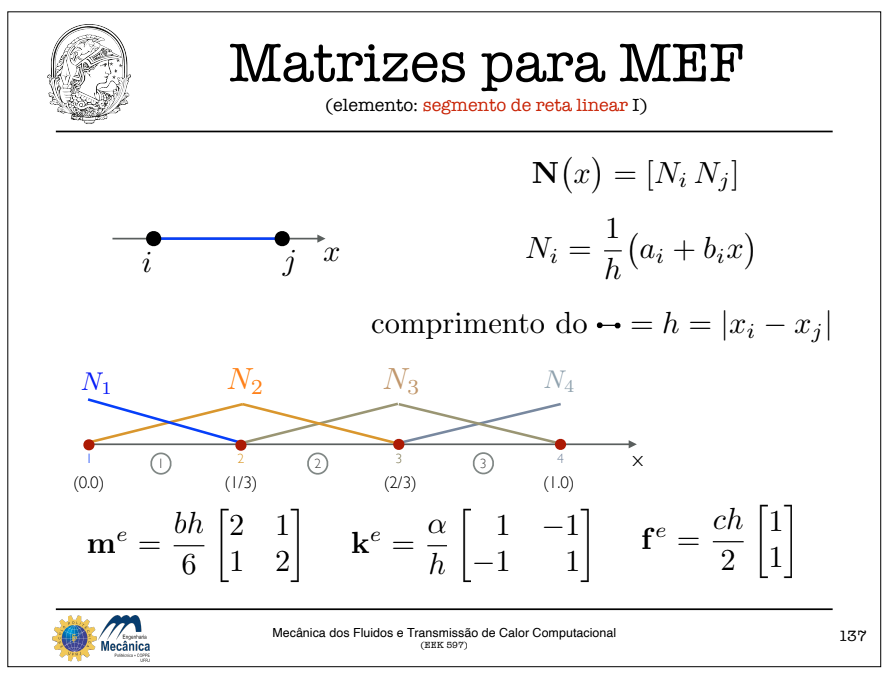

__Imports:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Problema:__ (Permanente) 

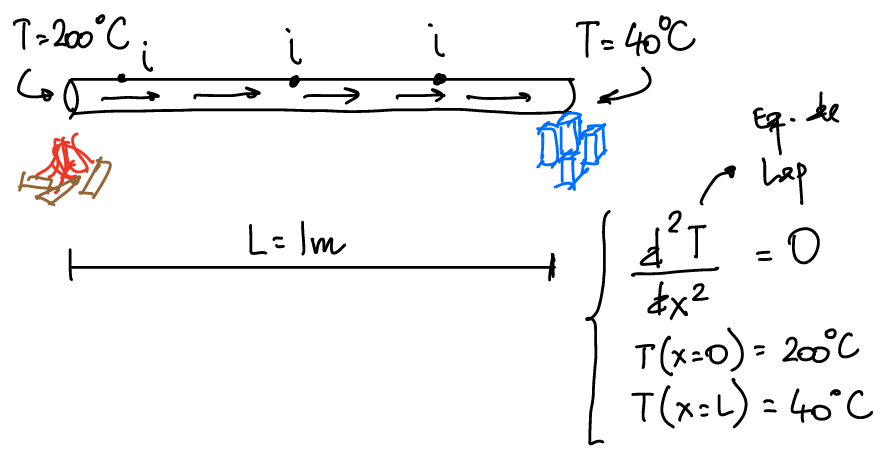

Solução analítica:

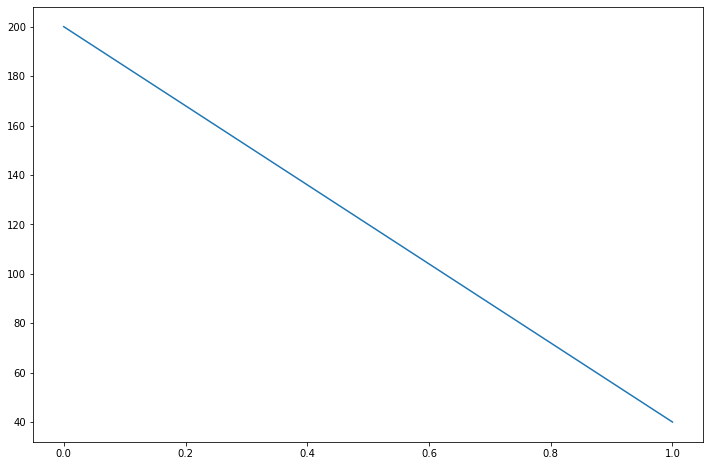

In [2]:
Lx=1
def T(x):
    c2=200
    c1=(40-c2)/Lx
    return c1*x+c2

plt.figure(figsize=(12,8))
x_sa = np.linspace(0, Lx)
plt.plot(x_sa,T(x_sa))
plt.show()

Solução numérica: Método dos elementos finitas

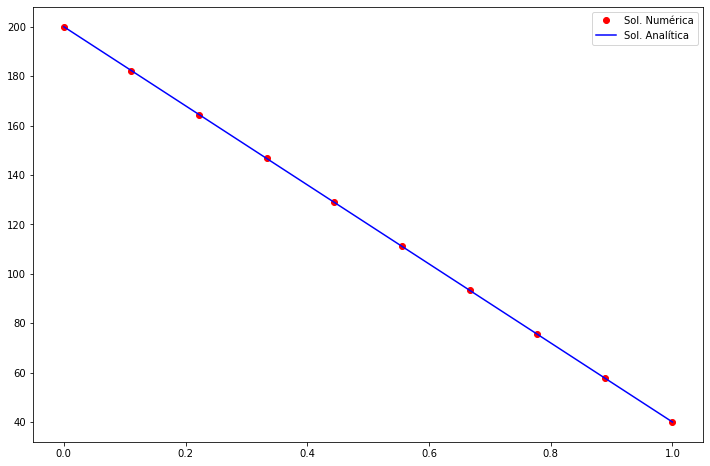

In [3]:
# parametros da simulacao
L = 1.0
npoints = 10
ne = npoints-1
alpha = 1.0
q = 0.0
rho = 1.0
cv = 1.0
Te = 200.0
Td = 40.0

# geracao de pontos
X = np.linspace(0,L,npoints)

# geracao da conectividade da malha
IEN = np.zeros((ne,2),dtype='int')
for e in range(0,ne):
    IEN[e] = [e,e+1]

Q = (q/(rho*cv))*np.ones((npoints),dtype='float')
K = np.zeros((npoints,npoints),dtype='float')
M = np.zeros((npoints,npoints),dtype='float')

for e in range(0,ne):
    [v1,v2] = IEN[e]
    length = X[v2] - X[v1]

    kelem = (alpha/length) * np.array([ [1,-1],[-1,1] ])
    melem = (length/6.0)   * np.array([ [2, 1],[1, 2] ])

    for ilocal in range(0,2):
        iglobal = int(IEN[e,ilocal])
        for jlocal in range(0,2):
            jglobal = int(IEN[e,jlocal])

            K[iglobal,jglobal] += kelem[ilocal,jlocal]
            M[iglobal,jglobal] += melem[ilocal,jlocal]

A = K.copy()
b = M@Q

# imposicao das condicoes de contorno
A[0,:]   = 0.0   # zerando a linha 0
A[0,0]   = 1.0   # colocando 1 na diagonal principal 0
b[0]     = Te    # colocando o valor da c.c. em b

A[-1,:]  = 0.0   # zerando a linha 4
A[-1,-1] = 1.0   # colocando 1 na diagonal princial 4
b[-1]    = Td    # colocando o valor da c.c. em b

Ainv = np.linalg.inv(A)
T_num = Ainv@b

plt.figure(figsize=(12,8))
plt.plot(X,T_num,'or')
plt.plot(x_sa,T(x_sa),'b')
plt.legend(['Sol. Numérica','Sol. Analítica'])
plt.show()

__Problema:__ (Com geração, permanente) 

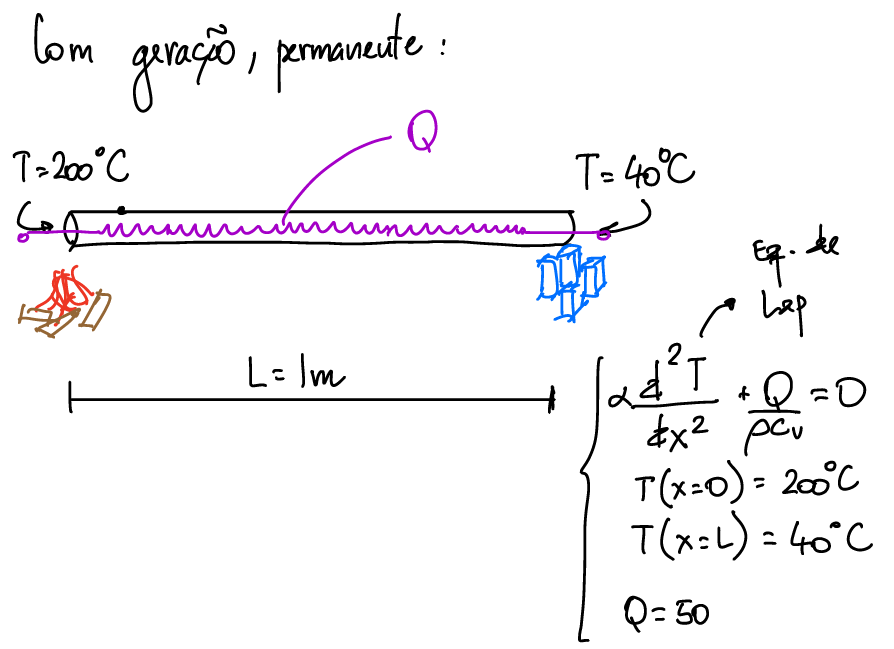

Solução analítica:

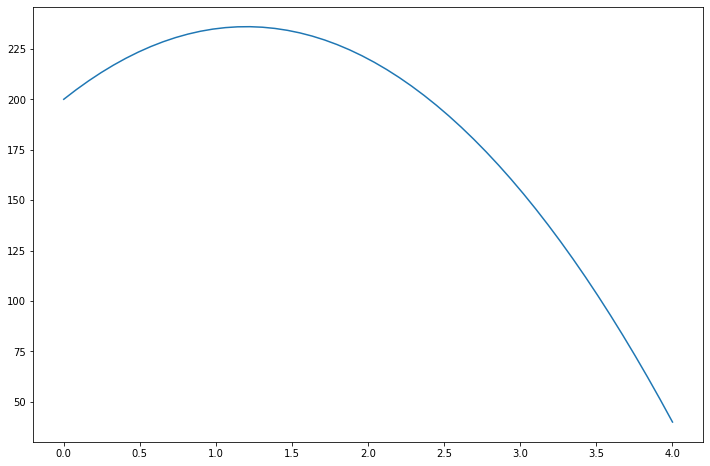

In [4]:
alpha = 1.0; rho = 1.0; Cv = 1.0; Q = 50; Lx=4
def T(x):
    c1=-Q/(2*rho*Cv*alpha)
    c3=200
    c2=-c1*Lx - 160/Lx
    return c1*x**2+c2*x+c3

x_sa = np.linspace(0, Lx)
T_sa = T(x_sa)
plt.figure(figsize=(12,8))
plt.plot(x_sa,T_sa)
plt.show()

Solução numérica: Método das diferenças finitas

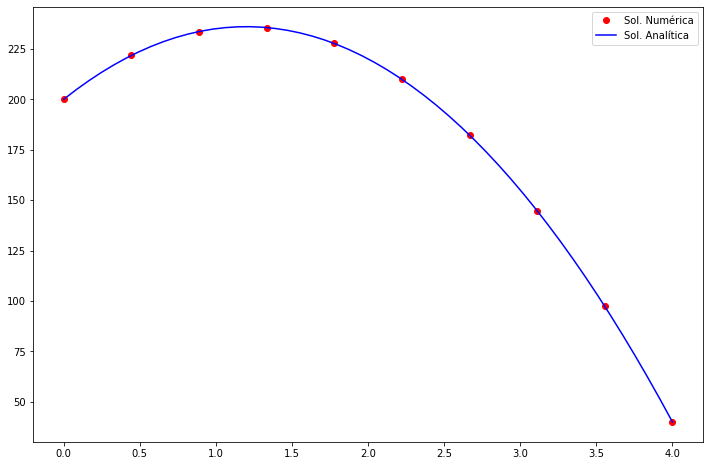

In [5]:
# parametros da simulacao
L = 4.0
npoints = 10
ne = npoints-1
alpha = 1.0
q = 50.0
rho = 1.0
cv = 1.0
Te = 200.0
Td = 40.0

# geracao de pontos
X = np.linspace(0,L,npoints)

# geracao da conectividade da malha
IEN = np.zeros( (ne,2),dtype='int' )
for e in range(0,ne):
    IEN[e] = [e,e+1]

Q = (q/(rho*cv))*np.ones ( (npoints),        dtype='float' )
K = np.zeros( (npoints,npoints),dtype='float' )
M = np.zeros( (npoints,npoints),dtype='float' )

for e in range(0,ne):
    [v1,v2] = IEN[e]
    length = X[v2] - X[v1]

    kelem = (alpha/length) * np.array([ [1,-1],[-1,1] ])
    melem = (length/6.0)   * np.array([ [2, 1],[1, 2] ])

    for ilocal in range(0,2):
        iglobal = int(IEN[e,ilocal])
        for jlocal in range(0,2):
            jglobal = int(IEN[e,jlocal])

            K[iglobal,jglobal] += kelem[ilocal,jlocal]
            M[iglobal,jglobal] += melem[ilocal,jlocal]

A = K.copy()
b = M@Q

# imposicao das condicoes de contorno
A[0,:]   = 0.0   # zerando a linha 0
A[0,0]   = 1.0   # colocando 1 na diagonal principal 0
b[0]     = Te    # colocando o valor da c.c. em b

A[-1,:]  = 0.0   # zerando a linha 4
A[-1,-1] = 1.0   # colocando 1 na diagonal princial 4
b[-1]    = Td    # colocando o valor da c.c. em b

Ainv = np.linalg.inv(A)
T_num = Ainv@b

plt.figure(figsize=(12,8))
plt.plot(X,T_num,'or')
plt.plot(x_sa,T_sa,'b')
plt.legend(['Sol. Numérica','Sol. Analítica'])
plt.show()

__Problema:__ (Transiente) 

## Solução do problema térmico 1-D : Elemento Quadrático

- Método dos Elementos finitas - Elemento Quadrático

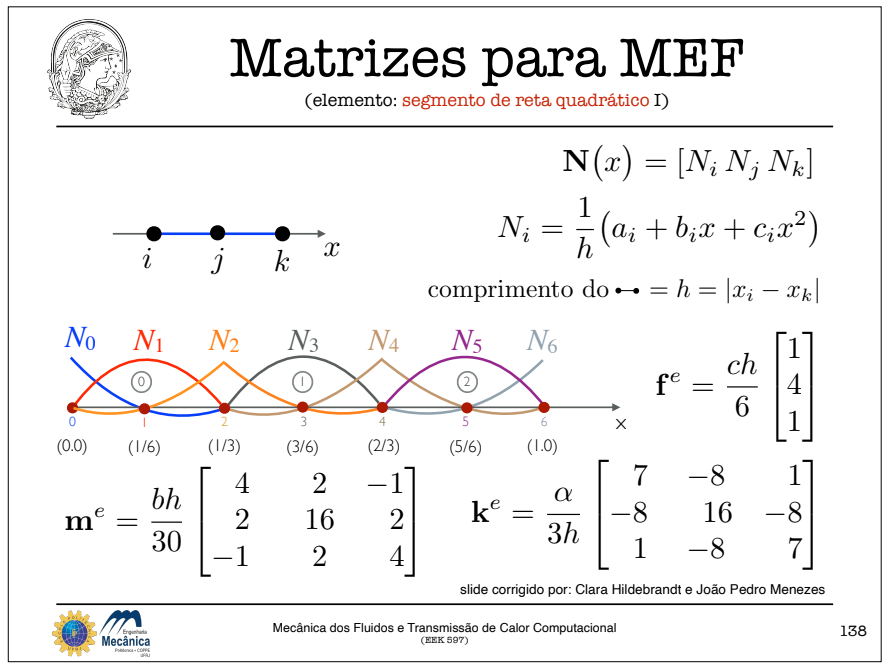

In [6]:
import numpy as np
import matplotlib.pyplot as plt

__Problema:__ (Permanente) 

Solução analítica:

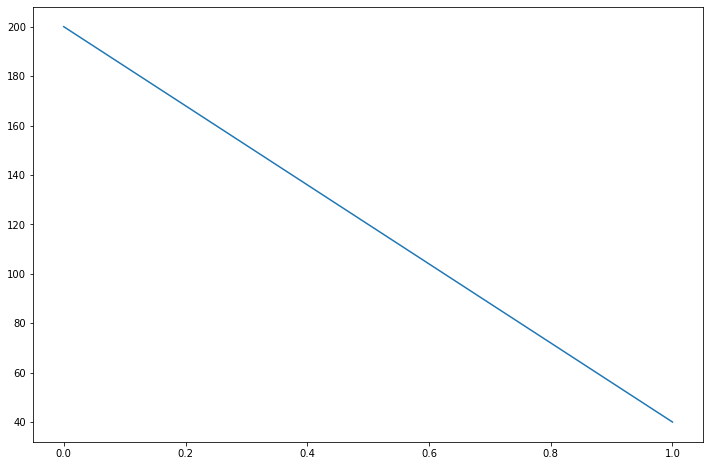

In [7]:
Lx=1
def T(x):
    c2=200
    c1=(40-c2)/Lx
    return c1*x+c2

plt.figure(figsize=(12,8))
x_sa = np.linspace(0, Lx)
plt.plot(x_sa,T(x_sa))
plt.show()

Solução numérica: Método dos elementos finitas

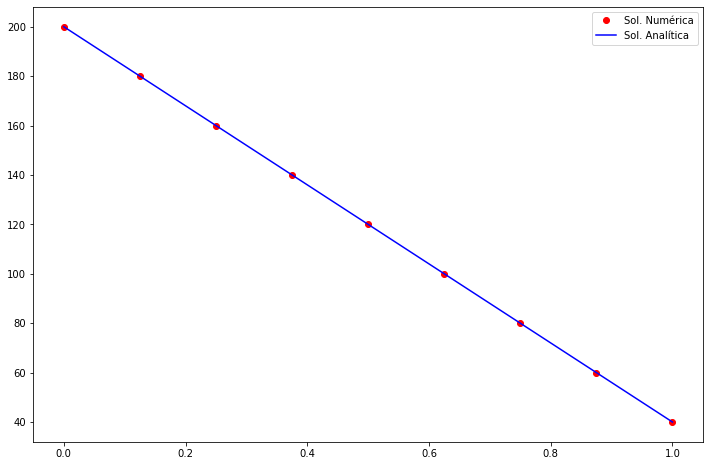

In [8]:
# parametros da simulacao
L = 1.0
npoints = 9 #Apenas valor pares
ne = int((npoints-1)/2)
alpha = 1.0
q = 0.0
rho = 1.0
cv = 1.0
Te = 200.0
Td = 40.0

# geracao de pontos
X = np.linspace(0,L,npoints)
# geracao da conectividade da malha
IEN = np.zeros((ne,3),dtype='int')
count = 0
for e in range(0,ne):
    IEN[e] = [count,count+1,count+2]
    count += 2
    
Q = (q/(rho*cv))*np.ones((npoints),dtype='float')
K = np.zeros((npoints,npoints),dtype='float')
M = np.zeros((npoints,npoints),dtype='float')

for e in range(0,ne):
    v1 = IEN[e,0]
    v2 = IEN[e,1]
    v3 = IEN[e,2]
    h = X[v3] - X[v1]

    kelem = (alpha/(3*h))*np.array([[ 7.0,-8.0, 1.0],
                                 [-8.0,16.0,-8.0],
                                 [ 1.0,-8.0, 7.0]])
    melem = (h/30.0)*np.array([[ 4.0, 2.0,-1.0],
                            [ 2.0,16.0, 2.0],
                            [-1.0, 2.0, 4.0]])

    for ilocal in range(0,3):
        iglobal = int(IEN[e,ilocal])
        for jlocal in range(0,3):
            jglobal = int(IEN[e,jlocal])

            K[iglobal,jglobal] += kelem[ilocal,jlocal]
            M[iglobal,jglobal] += melem[ilocal,jlocal]

A = K.copy()
b = M@Q

# imposicao das condicoes de contorno
A[0,:]   = 0.0   # zerando a linha 0
A[0,0]   = 1.0   # colocando 1 na diagonal principal 0
b[0]     = Te    # colocando o valor da c.c. em b

A[-1,:]  = 0.0   # zerando a linha 4
A[-1,-1] = 1.0   # colocando 1 na diagonal princial 4
b[-1]    = Td    # colocando o valor da c.c. em b

Ainv = np.linalg.inv(A)
T_num = Ainv@b

plt.figure(figsize=(12,8))
plt.plot(X,T_num,'or')
plt.plot(x_sa,T(x_sa),'b')
plt.legend(['Sol. Numérica','Sol. Analítica'])
plt.show()

__Problema:__ (Com geração, permanente) 

Solução analítica:

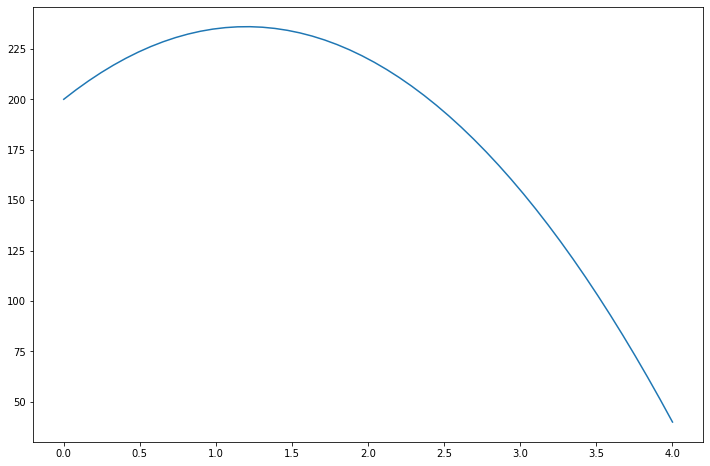

In [9]:
alpha = 1.0; rho = 1.0; Cv = 1.0; Q = 50; Lx=4
def T(x):
    c1=-Q/(2*rho*Cv*alpha)
    c3=200
    c2=-c1*Lx - 160/Lx
    return c1*x**2+c2*x+c3

x_sa = np.linspace(0, Lx)
T_sa = T(x_sa)
plt.figure(figsize=(12,8))
plt.plot(x_sa,T_sa)
plt.show()

Solução numérica: Método das diferenças finitas

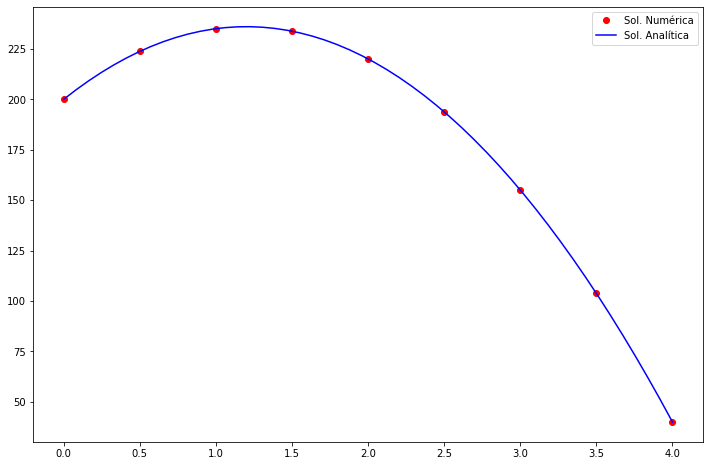

In [10]:
# parametros da simulacao
L = 4.0
npoints = 9 #Apenas valor impares
ne = int((npoints-1)/2)
alpha = 1.0
q = 50.0
rho = 1.0
cv = 1.0
Te = 200.0
Td = 40.0

# geracao de pontos
X = np.linspace(0,L,npoints)
# geracao da conectividade da malha
IEN = np.zeros((ne,3),dtype='int')
count = 0
for e in range(0,ne):
    IEN[e] = [count,count+1,count+2]
    count += 2
    
Q = (q/(rho*cv))*np.ones((npoints),dtype='float')
K = np.zeros((npoints,npoints),dtype='float')
M = np.zeros((npoints,npoints),dtype='float')

for e in range(0,ne):
    v1 = IEN[e,0]
    v2 = IEN[e,1]
    v3 = IEN[e,2]
    h = X[v3] - X[v1]

    kelem = (alpha/(3*h))*np.array([[ 7.0,-8.0, 1.0],
                                 [-8.0,16.0,-8.0],
                                 [ 1.0,-8.0, 7.0]])
    melem = (h/30.0)*np.array([[ 4.0, 2.0,-1.0],
                            [ 2.0,16.0, 2.0],
                            [-1.0, 2.0, 4.0]])

    for ilocal in range(0,3):
        iglobal = int(IEN[e,ilocal])
        for jlocal in range(0,3):
            jglobal = int(IEN[e,jlocal])

            K[iglobal,jglobal] += kelem[ilocal,jlocal]
            M[iglobal,jglobal] += melem[ilocal,jlocal]

A = K.copy()
b = M@Q

# imposicao das condicoes de contorno
A[0,:]   = 0.0   # zerando a linha 0
A[0,0]   = 1.0   # colocando 1 na diagonal principal 0
b[0]     = Te    # colocando o valor da c.c. em b

A[-1,:]  = 0.0   # zerando a linha 4
A[-1,-1] = 1.0   # colocando 1 na diagonal princial 4
b[-1]    = Td    # colocando o valor da c.c. em b

Ainv = np.linalg.inv(A)
T_num = Ainv@b

plt.figure(figsize=(12,8))
plt.plot(X,T_num,'or')
plt.plot(x_sa,T_sa,'b')
plt.legend(['Sol. Numérica','Sol. Analítica'])
plt.show()

## Solução do problema térmico 1-D: Elemento Cúbico

- Método dos Elementos finitas - Elemento Cúbico

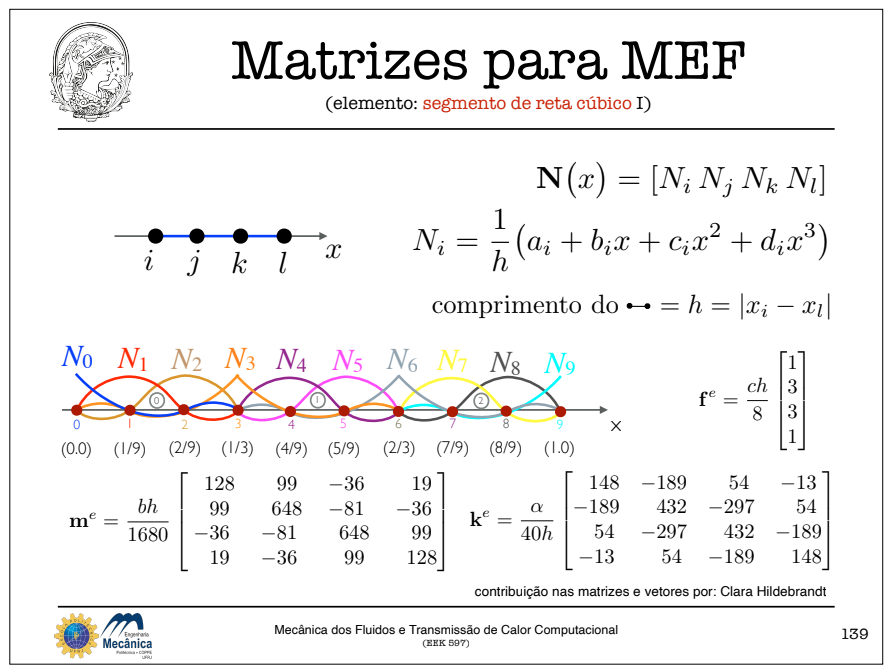

In [11]:
import numpy as np
import matplotlib.pyplot as plt

__Problema:__ (Permanente) 

Solução analítica:

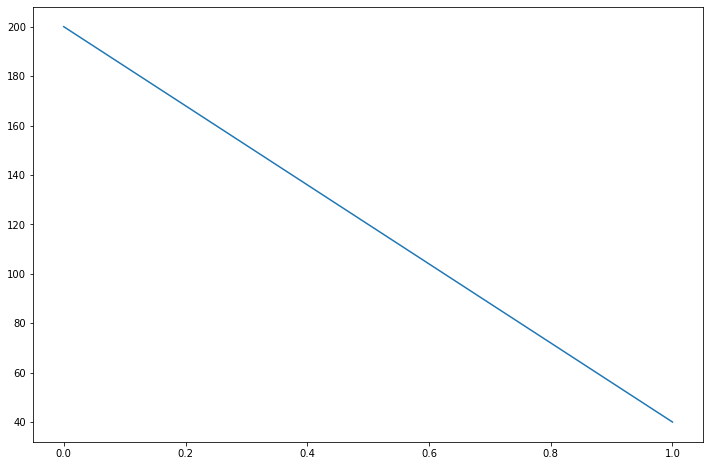

In [12]:
Lx=1
def T(x):
    c2=200
    c1=(40-c2)/Lx
    return c1*x+c2

plt.figure(figsize=(12,8))
x_sa = np.linspace(0, Lx)
T_sa = T(x_sa)
plt.plot(x_sa,T_sa)
plt.show()

Solução numérica: Método dos elementos finitas

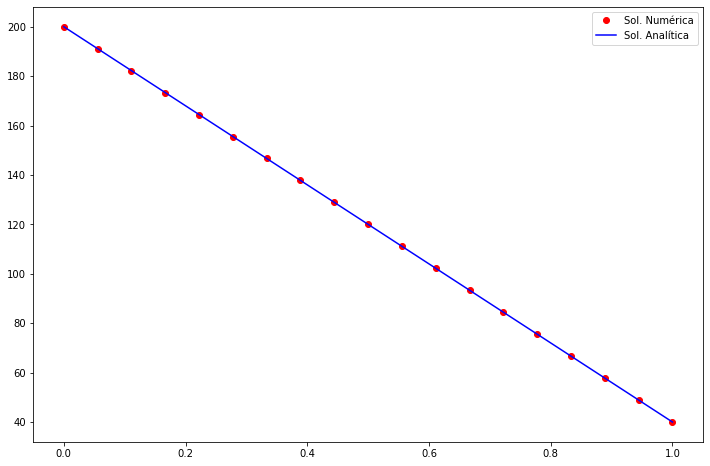

In [13]:
# parametros da simulacao
L = 1.0
npoints = 19 #Apenas valor multiplos de 3 + 1 
ne = int((npoints-1)/3)
alpha = 1.0
q = 0.0
rho = 1.0
cv = 1.0
Te = 200.0
Td = 40.0

# geracao de pontos
X = np.linspace(0,L,npoints)
# geracao da conectividade da malha
IEN = np.zeros((ne,4),dtype='int')
count = 0
for e in range(0,ne):
    IEN[e] = [count,count+1,count+2,count+3]
    count += 3

Q = (q/(rho*cv))*np.ones((npoints),dtype='float')
K = np.zeros((npoints,npoints),dtype='float')
M = np.zeros((npoints,npoints),dtype='float')

for e in range(0,ne):
    v1 = IEN[e,0]
    v2 = IEN[e,1]
    v3 = IEN[e,2]
    v4 = IEN[e,3]
    h = X[v4] - X[v1]

    kelem = (alpha/(40*h))*np.array([[ 148.0, -189.0, 54.0, -13.0],
                                    [ -189.0, 432.0, -297.0, 54.0],
                                    [ 54.0, -297.0, 432.0, -189.0],
                                    [ -13.0, 54.0, -189.0, 148.0]])
    melem = (h/1680.0)*np.array([[ 128.0, 99.0, -36.0, 19.0],
                               [ 99.0, 648.0, -81.0, -36.0],
                               [ -36.0, -81.0, 648.0, 99.0],
                               [ 19.0, -36.0, 99.0, 128.0]])

    for ilocal in range(0,4):
        iglobal = int(IEN[e,ilocal])
        for jlocal in range(0,4):
            jglobal = int(IEN[e,jlocal])

            K[iglobal,jglobal] += kelem[ilocal,jlocal]
            M[iglobal,jglobal] += melem[ilocal,jlocal]

A = K.copy()
b = M@Q

# imposicao das condicoes de contorno
A[0,:]   = 0.0   # zerando a linha 0
A[0,0]   = 1.0   # colocando 1 na diagonal principal 0
b[0]     = Te    # colocando o valor da c.c. em b

A[-1,:]  = 0.0   # zerando a linha 4
A[-1,-1] = 1.0   # colocando 1 na diagonal princial 4
b[-1]    = Td    # colocando o valor da c.c. em b

Ainv = np.linalg.inv(A)
T_num = Ainv@b

plt.figure(figsize=(12,8))
plt.plot(X,T_num,'or')
plt.plot(x_sa,T_sa,'b')
plt.legend(['Sol. Numérica','Sol. Analítica'])
plt.show()

__Problema:__ (Com geração, permanente) 

Solução analítica:

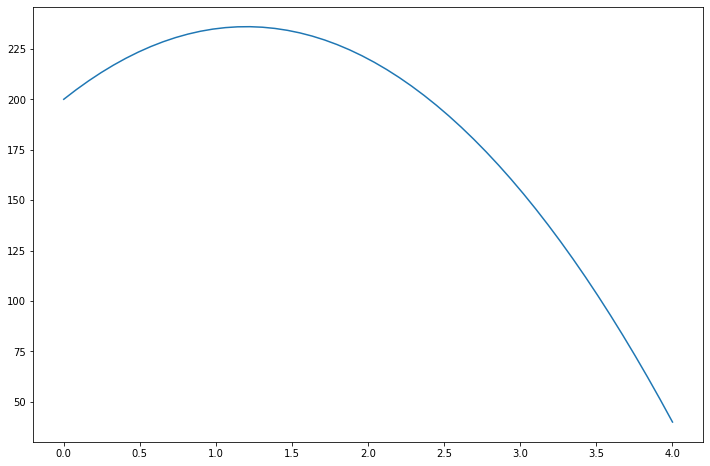

In [14]:
alpha = 1.0; rho = 1.0; Cv = 1.0; Q = 50; Lx=4
def T(x):
    c1=-Q/(2*rho*Cv*alpha)
    c3=200
    c2=-c1*Lx - 160/Lx
    return c1*x**2+c2*x+c3

x_sa = np.linspace(0, Lx)
T_sa = T(x_sa)
plt.figure(figsize=(12,8))
plt.plot(x_sa,T_sa)
plt.show()

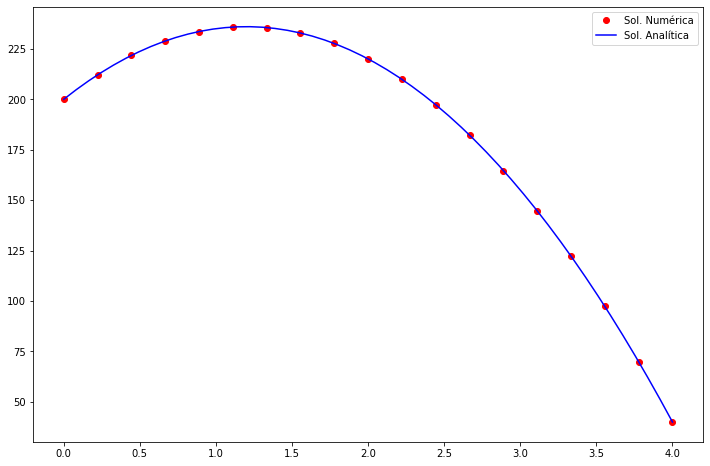

In [15]:
# parametros da simulacao
L = 4.0
npoints = 19 #Apenas valor multiplos de 3 + 1 
ne = int((npoints-1)/3)
alpha = 1.0
q = 50.0
rho = 1.0
cv = 1.0
Te = 200.0
Td = 40.0

# geracao de pontos
X = np.linspace(0,L,npoints)
# geracao da conectividade da malha
IEN = np.zeros((ne,4),dtype='int')
count = 0
for e in range(0,ne):
    IEN[e] = [count,count+1,count+2,count+3]
    count += 3

Q = (q/(rho*cv))*np.ones((npoints),dtype='float')
K = np.zeros((npoints,npoints),dtype='float')
M = np.zeros((npoints,npoints),dtype='float')

for e in range(0,ne):
    v1 = IEN[e,0]
    v2 = IEN[e,1]
    v3 = IEN[e,2]
    v4 = IEN[e,3]
    h = X[v4] - X[v1]

    kelem = (alpha/(40*h))*np.array([[ 148.0, -189.0, 54.0, -13.0],
                                    [ -189.0, 432.0, -297.0, 54.0],
                                    [ 54.0, -297.0, 432.0, -189.0],
                                    [ -13.0, 54.0, -189.0, 148.0]])
    melem = (h/1680.0)*np.array([[ 128.0, 99.0, -36.0, 19.0],
                               [ 99.0, 648.0, -81.0, -36.0],
                               [ -36.0, -81.0, 648.0, 99.0],
                               [ 19.0, -36.0, 99.0, 128.0]])

    for ilocal in range(0,4):
        iglobal = int(IEN[e,ilocal])
        for jlocal in range(0,4):
            jglobal = int(IEN[e,jlocal])

            K[iglobal,jglobal] += kelem[ilocal,jlocal]
            M[iglobal,jglobal] += melem[ilocal,jlocal]

A = K.copy()
b = M@Q

# imposicao das condicoes de contorno
A[0,:]   = 0.0   # zerando a linha 0
A[0,0]   = 1.0   # colocando 1 na diagonal principal 0
b[0]     = Te    # colocando o valor da c.c. em b

A[-1,:]  = 0.0   # zerando a linha 4
A[-1,-1] = 1.0   # colocando 1 na diagonal princial 4
b[-1]    = Td    # colocando o valor da c.c. em b

Ainv = np.linalg.inv(A)
T_num = Ainv@b

plt.figure(figsize=(12,8))
plt.plot(X,T_num,'or')
plt.plot(x_sa,T_sa,'b')
plt.legend(['Sol. Numérica','Sol. Analítica'])
plt.show()